In [9]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [10]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/'
x1ds = np.hstack((glob.glob('{}*0_x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path)), glob.glob('{}*x1dsum.fits'.format(path))))
x1ds


array(['/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13040_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13050_sx1.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/leoo12010_x1dsum.fits'],
      dtype='<U70')

/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13010_x1d.fits
G140M
159.60316


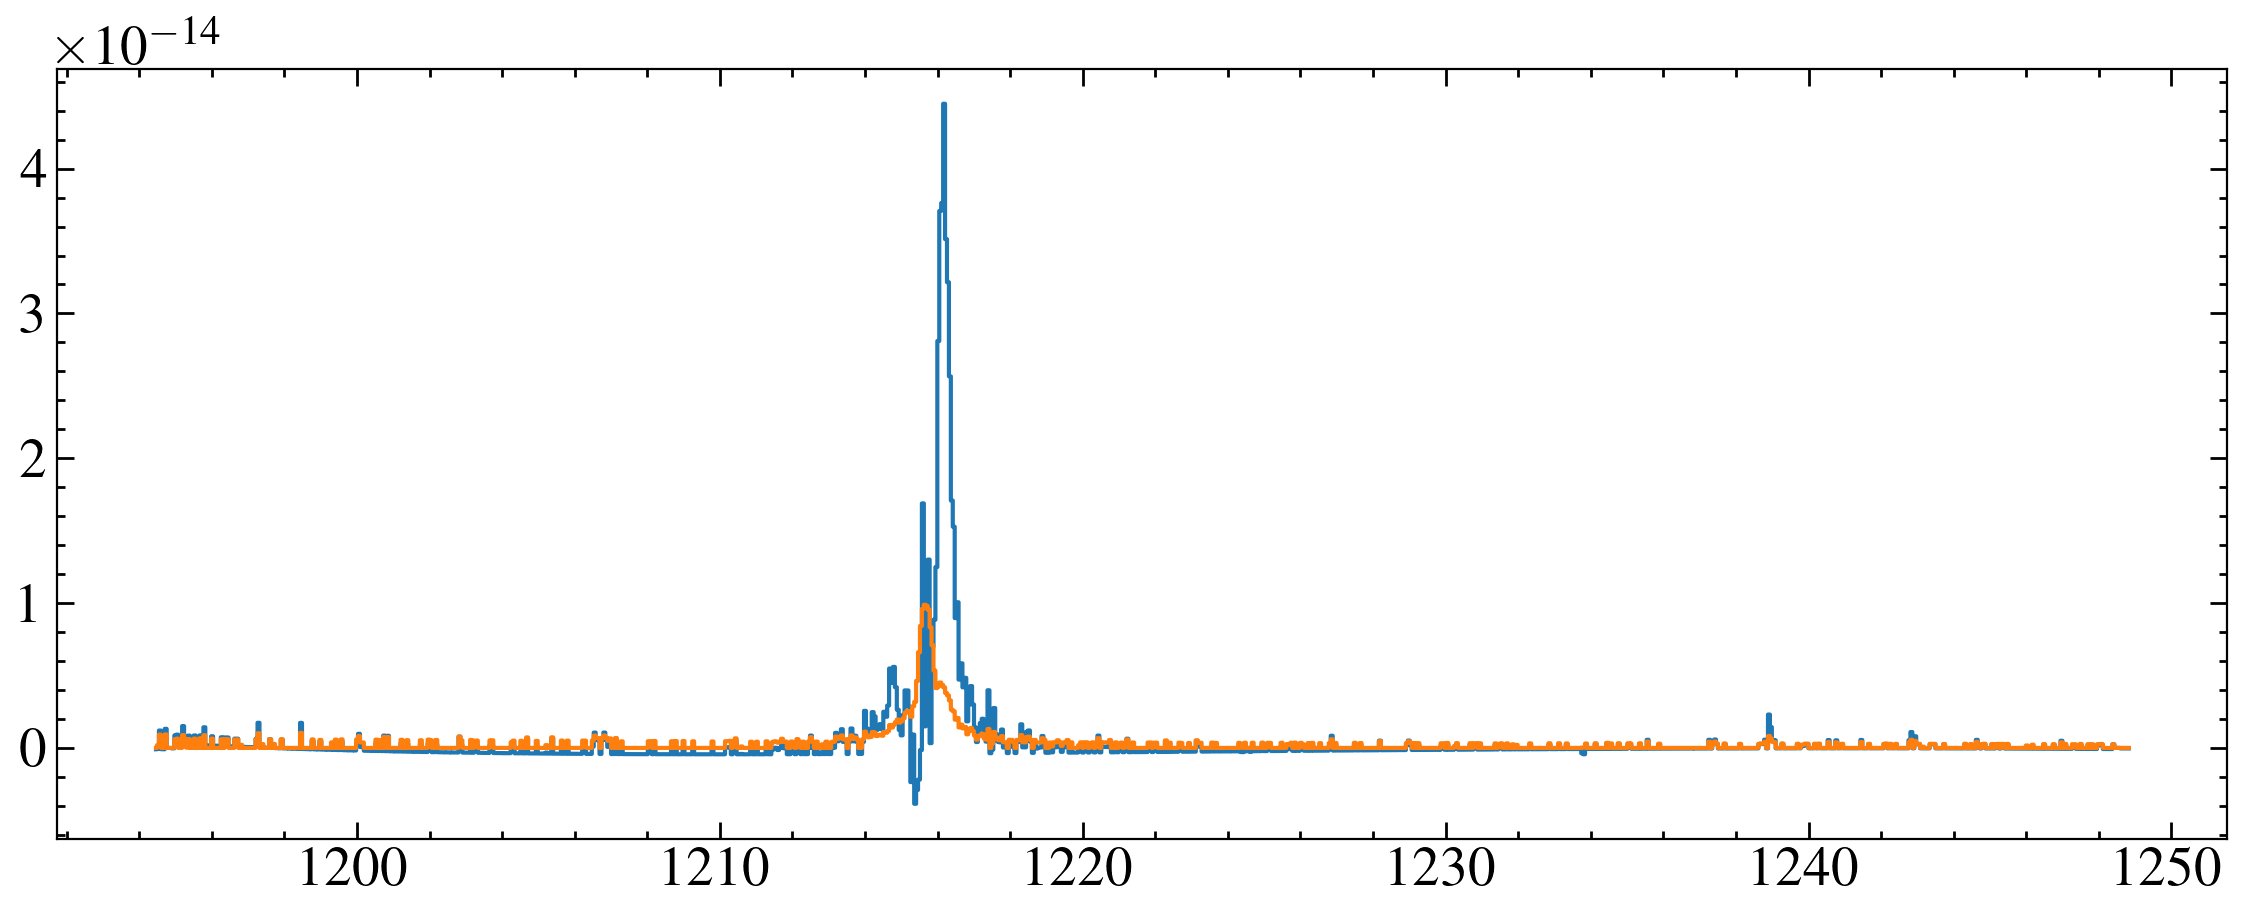

/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13020_x1d.fits
G140M
159.9237


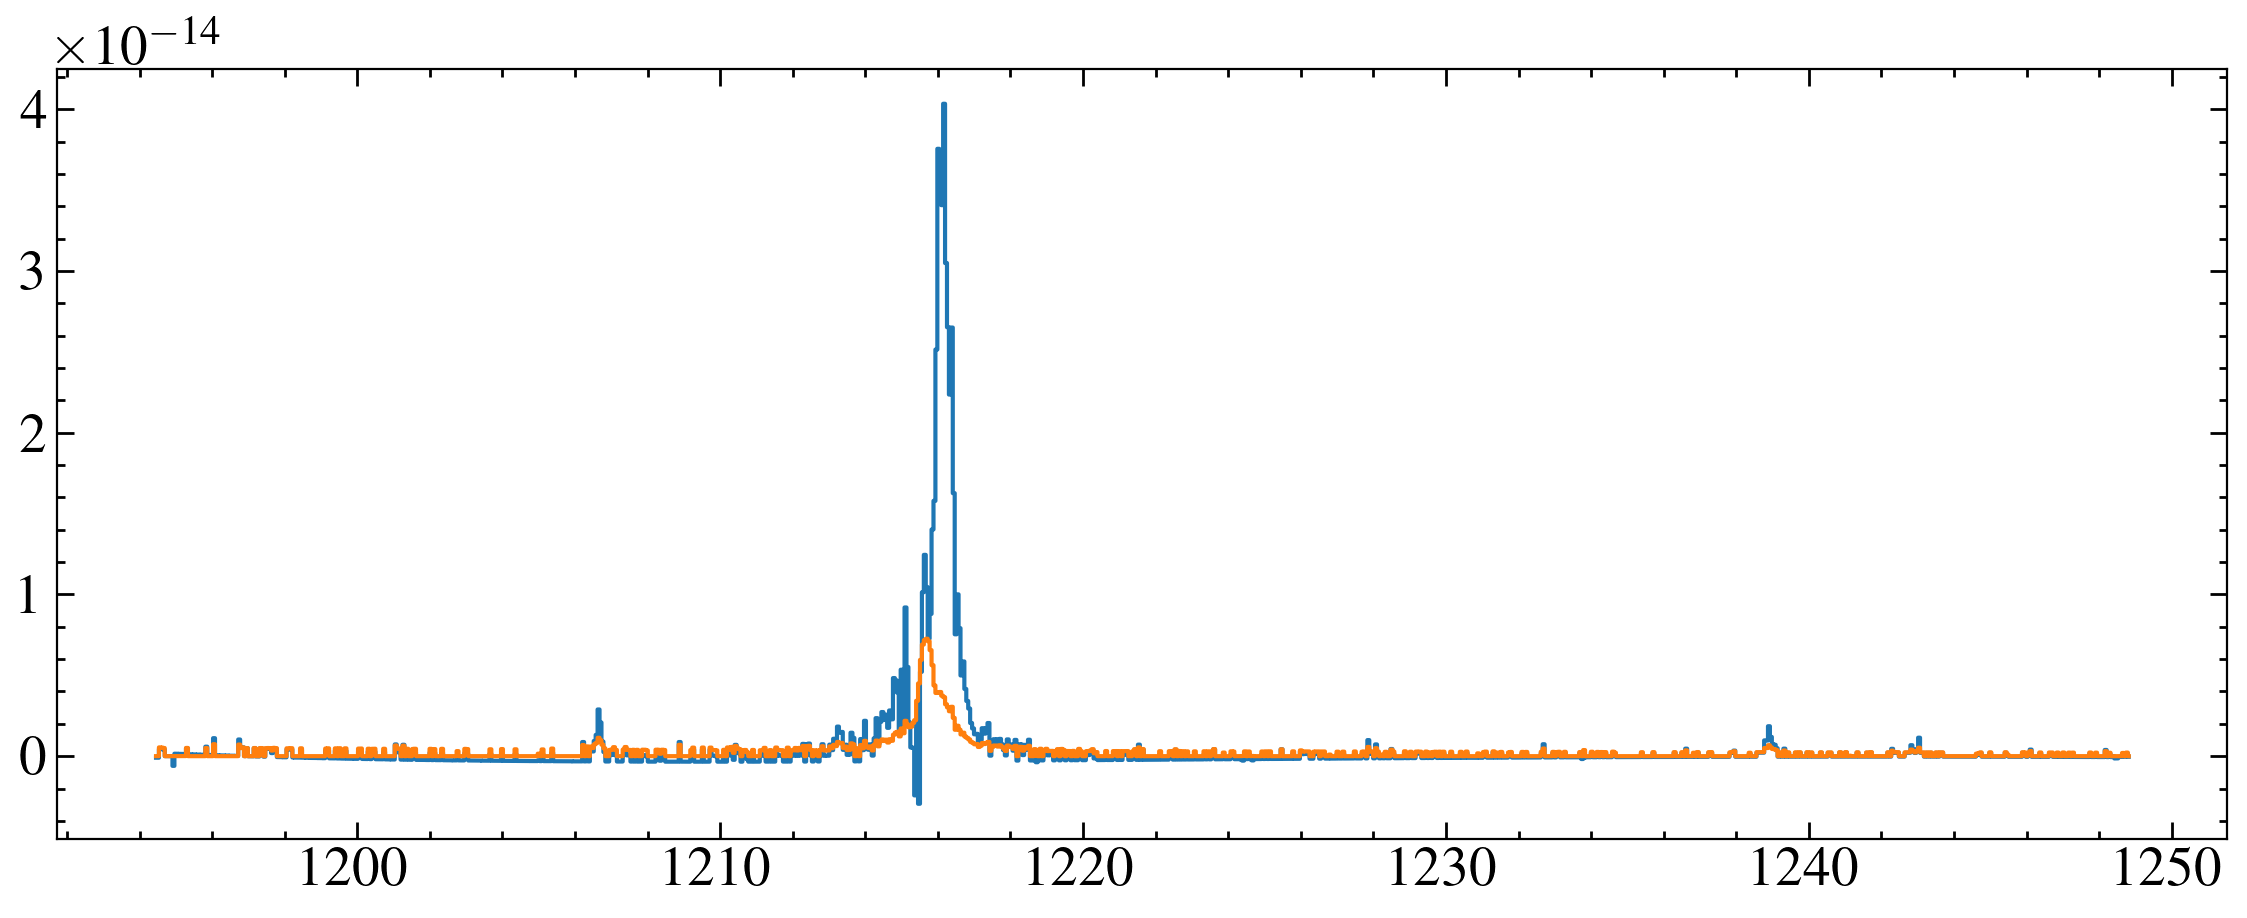

/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13030_x1d.fits
G140M
500.03876


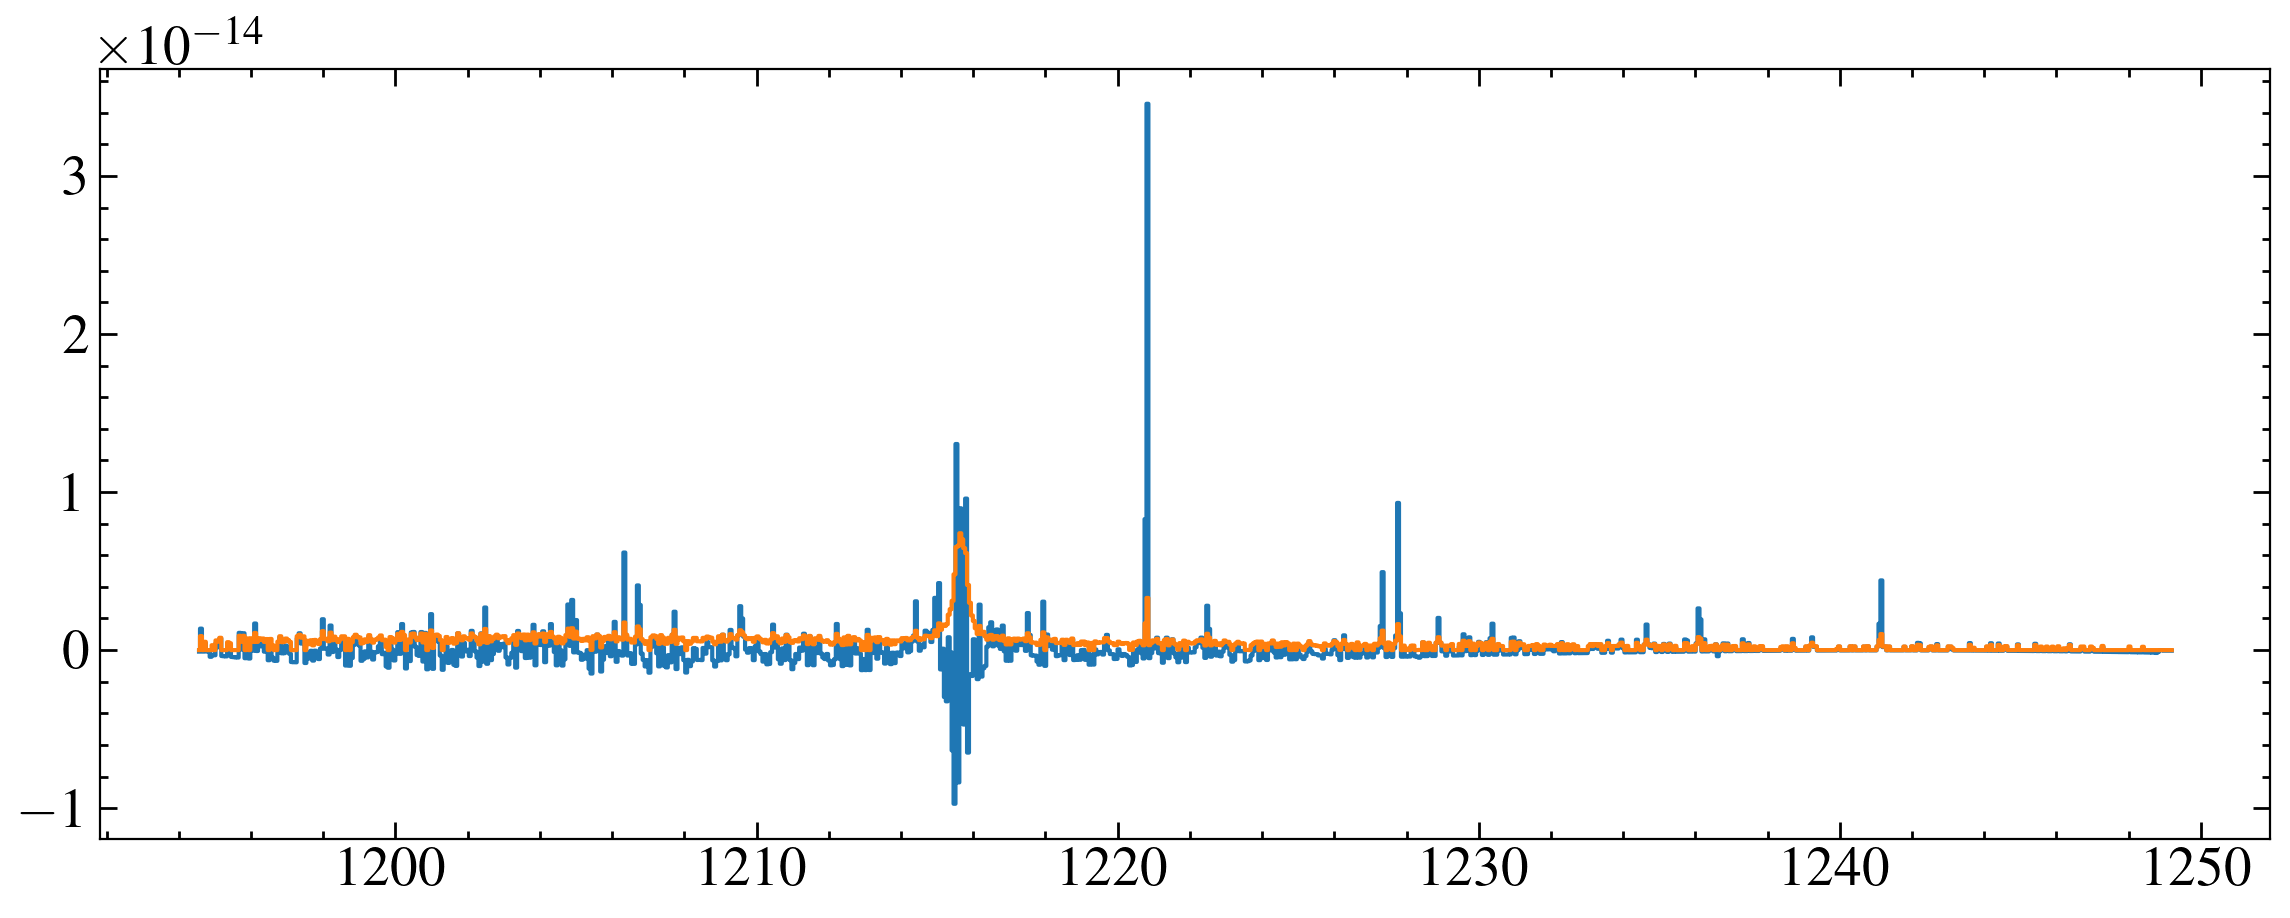

/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13040_x1d.fits
G230L
537.8063


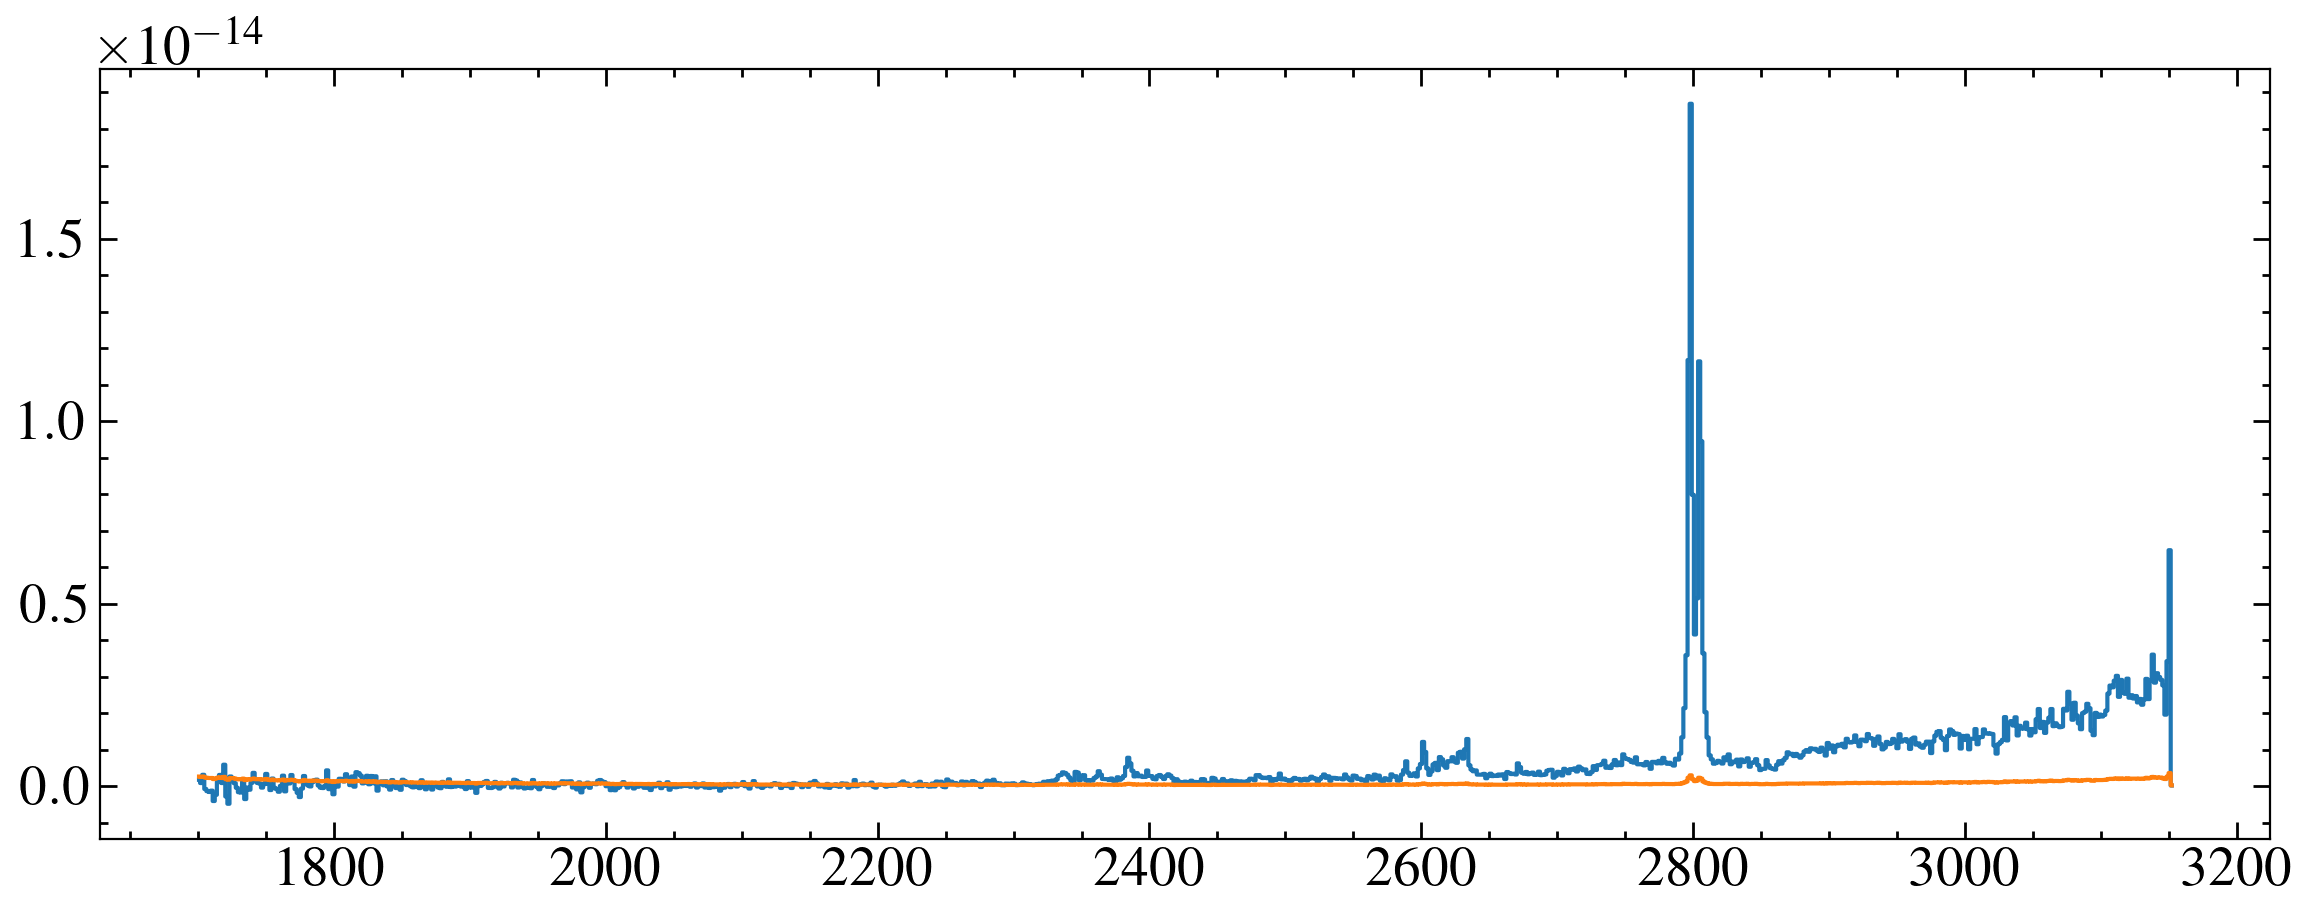

/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13050_sx1.fits
G430L
895.03186


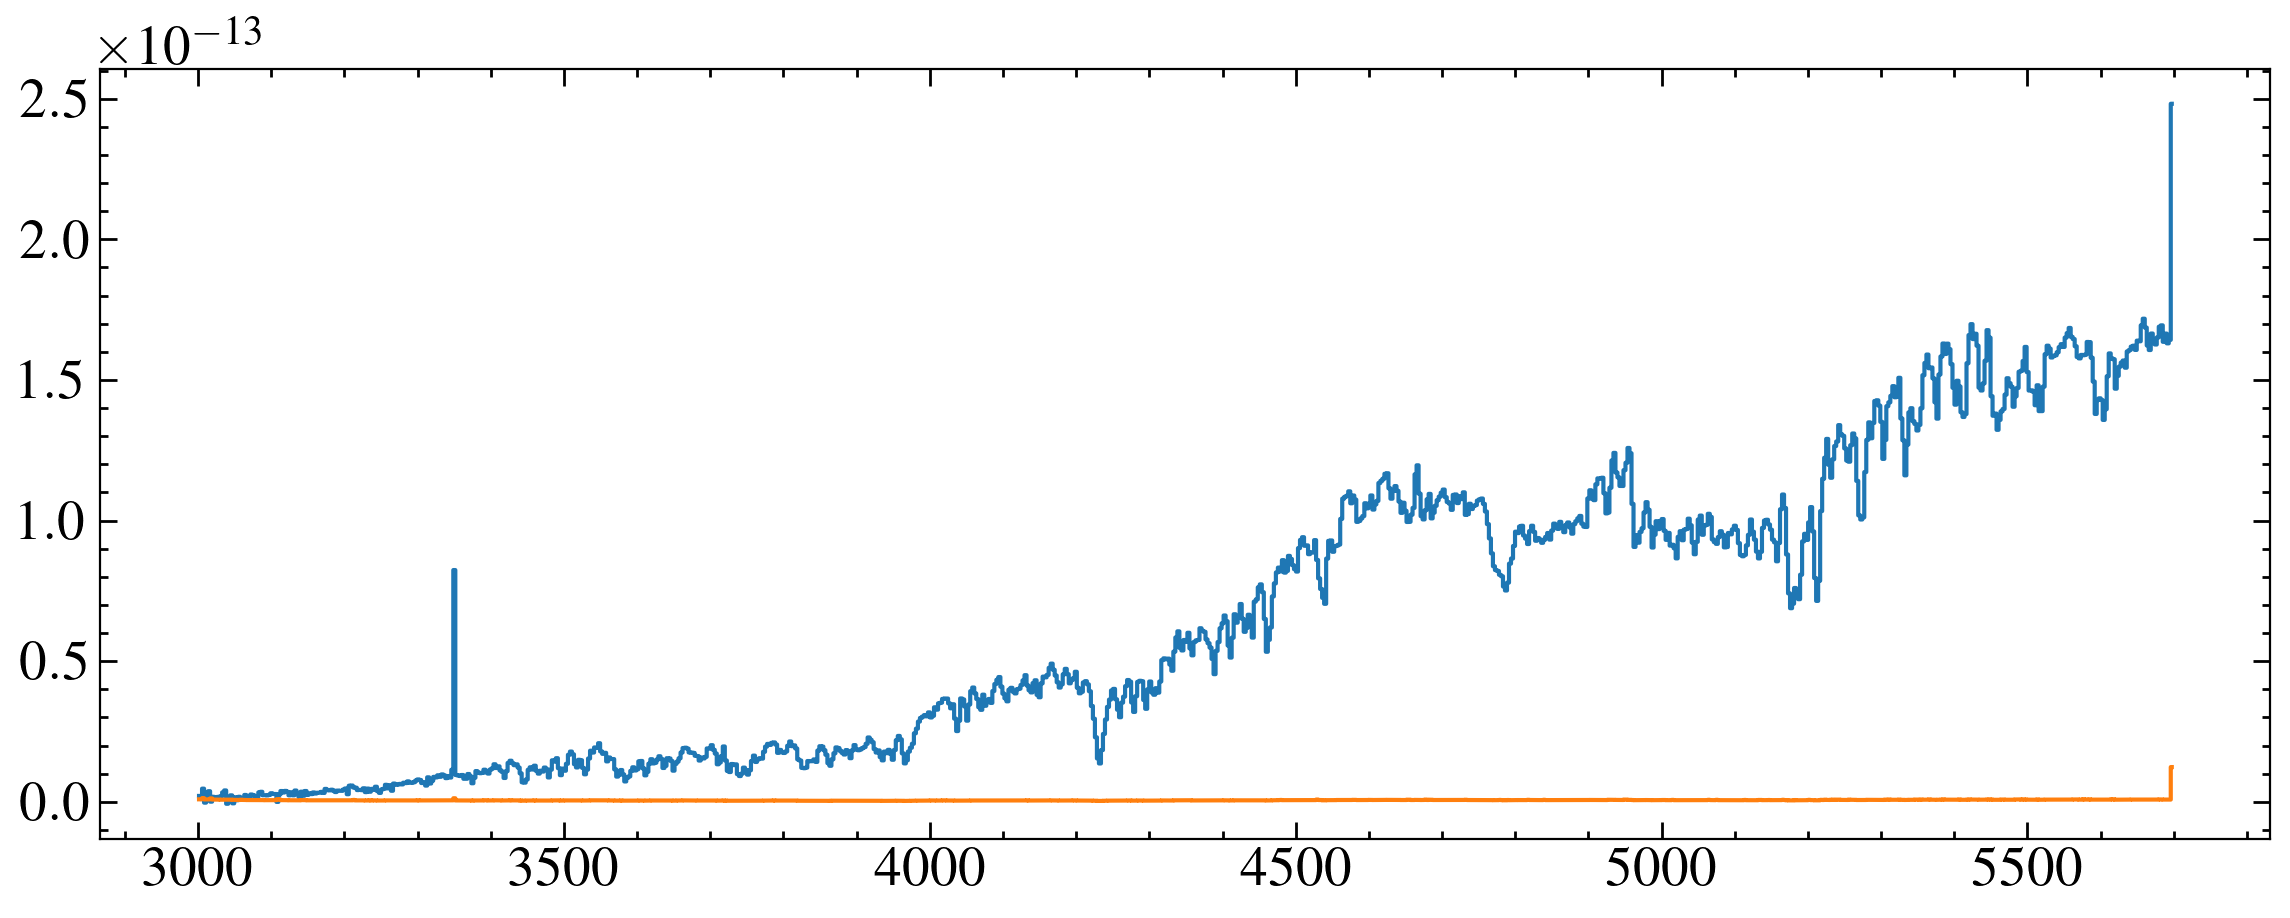

In [11]:
for x in x1ds[:-1]:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    if x != x1ds[-1]:
        print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating in ['G140M', 'G140L']:
        mask = (w > 1160)
    if grating =='G230L':
        mask = (w > 1700)
    if grating =='G430L':
        mask = (w > 3000)
    
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
    plt.show()
    

In [12]:
import stistools
os.environ['oref'] = path 

In [13]:
for root in  ['oeoo13030']:

    raw = '{}/{}_flt.fits'.format(path, root)
    rootname = fits.getheader(raw)['ROOTNAME'] 
    outname = 'reextractions/{}_new_x1d.fits'.format(rootname)
    stistools.x1d.x1d(raw, output = outname, trailer='reextractions/{}_new.trl'.format(rootname), a2center=160, maxsrch=5)

160.35678


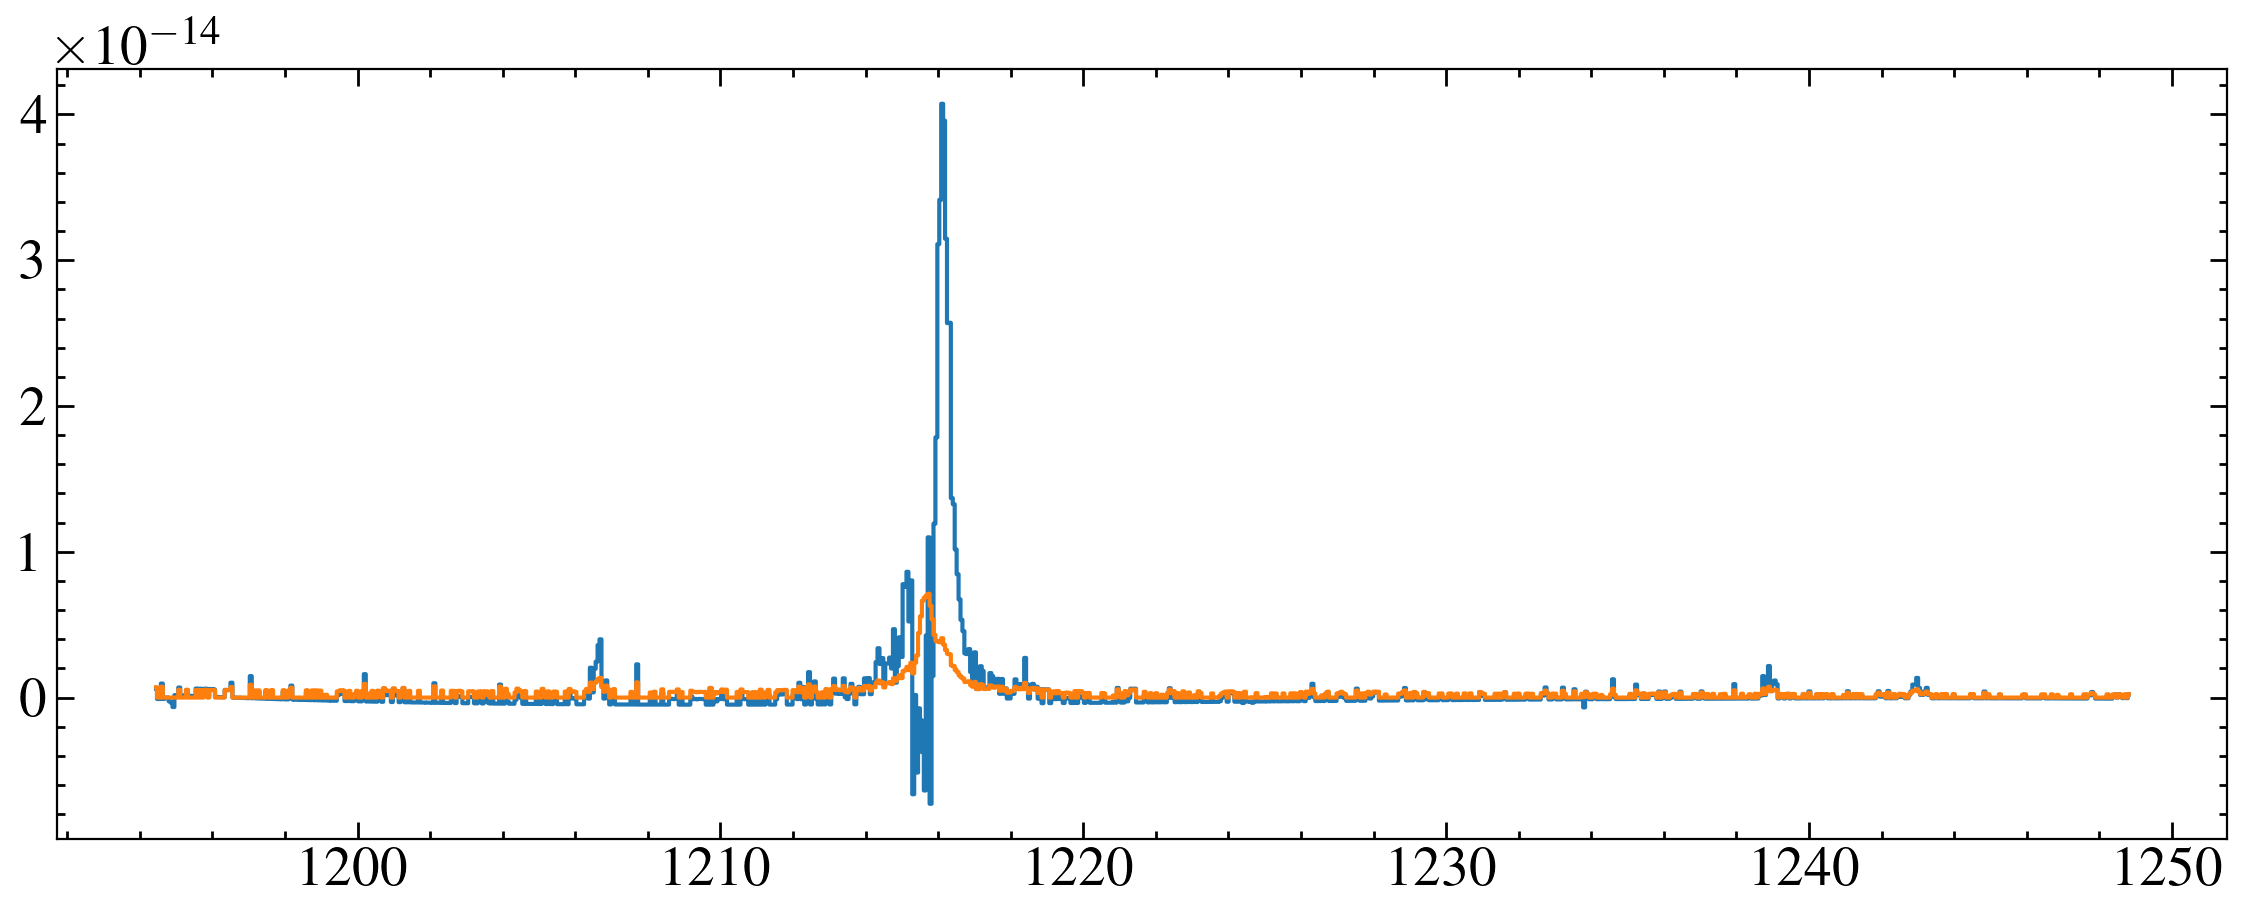

In [14]:
for root in  ['oeoo13030']:
        data = fits.getdata('reextractions/{}_new_x1d.fits'.format(root), 1)[0]
        print(data['A2Center'])
        w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
        w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
        # mask = w > 1700
        # w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid')
        plt.step(w, e, where='mid')
        plt.show()


/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13010_x1d.fits
G140M
/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13020_x1d.fits
G140M
/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13030_x1d.fits
G140M
/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13040_x1d.fits
G230L
/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/oeoo13050_sx1.fits
G430L
/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/leoo12010_x1dsum.fits
G130M


(1e-17, 5.628406109271941e-13)

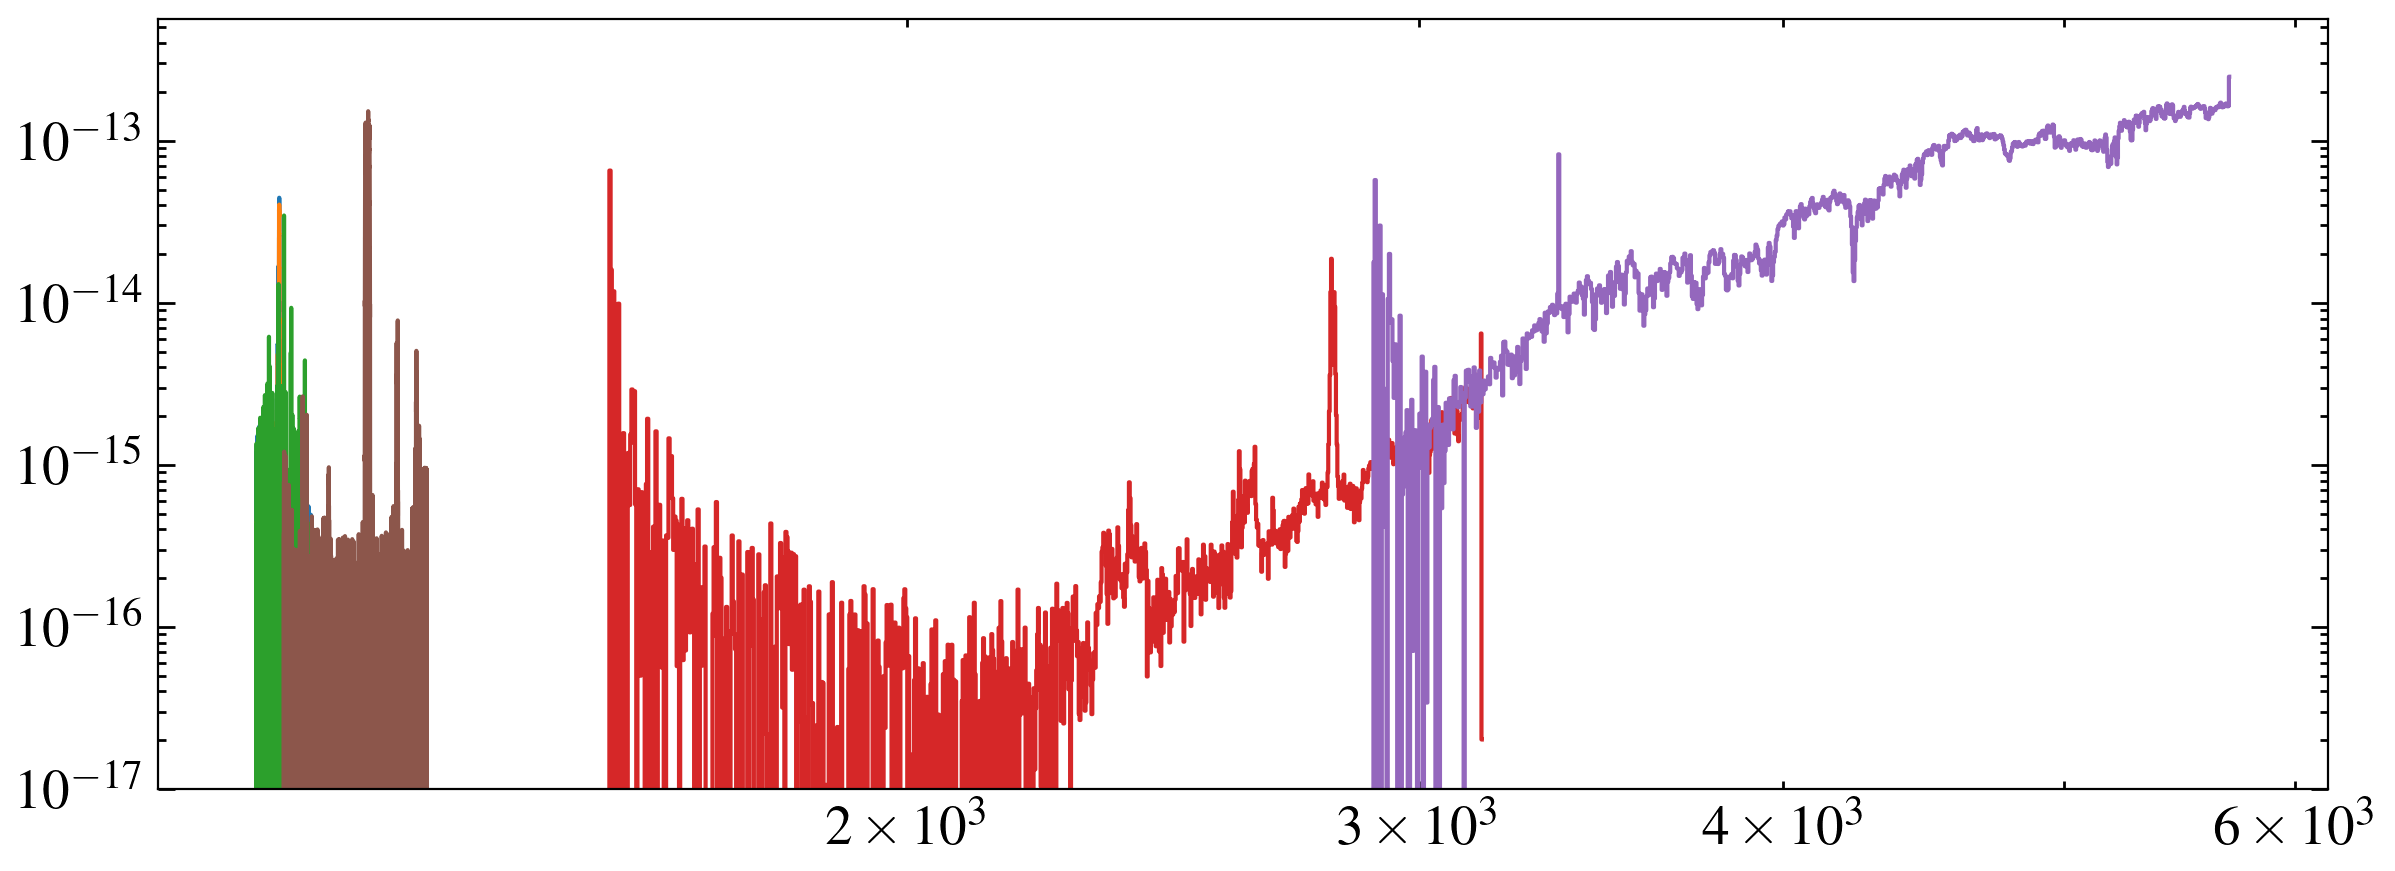

In [15]:
for x in x1ds:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    
    
    # w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-17)
    # plt.show()
    

/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/leoo12010_x1dsum.fits
G130M


(-1e-15, 1e-14)

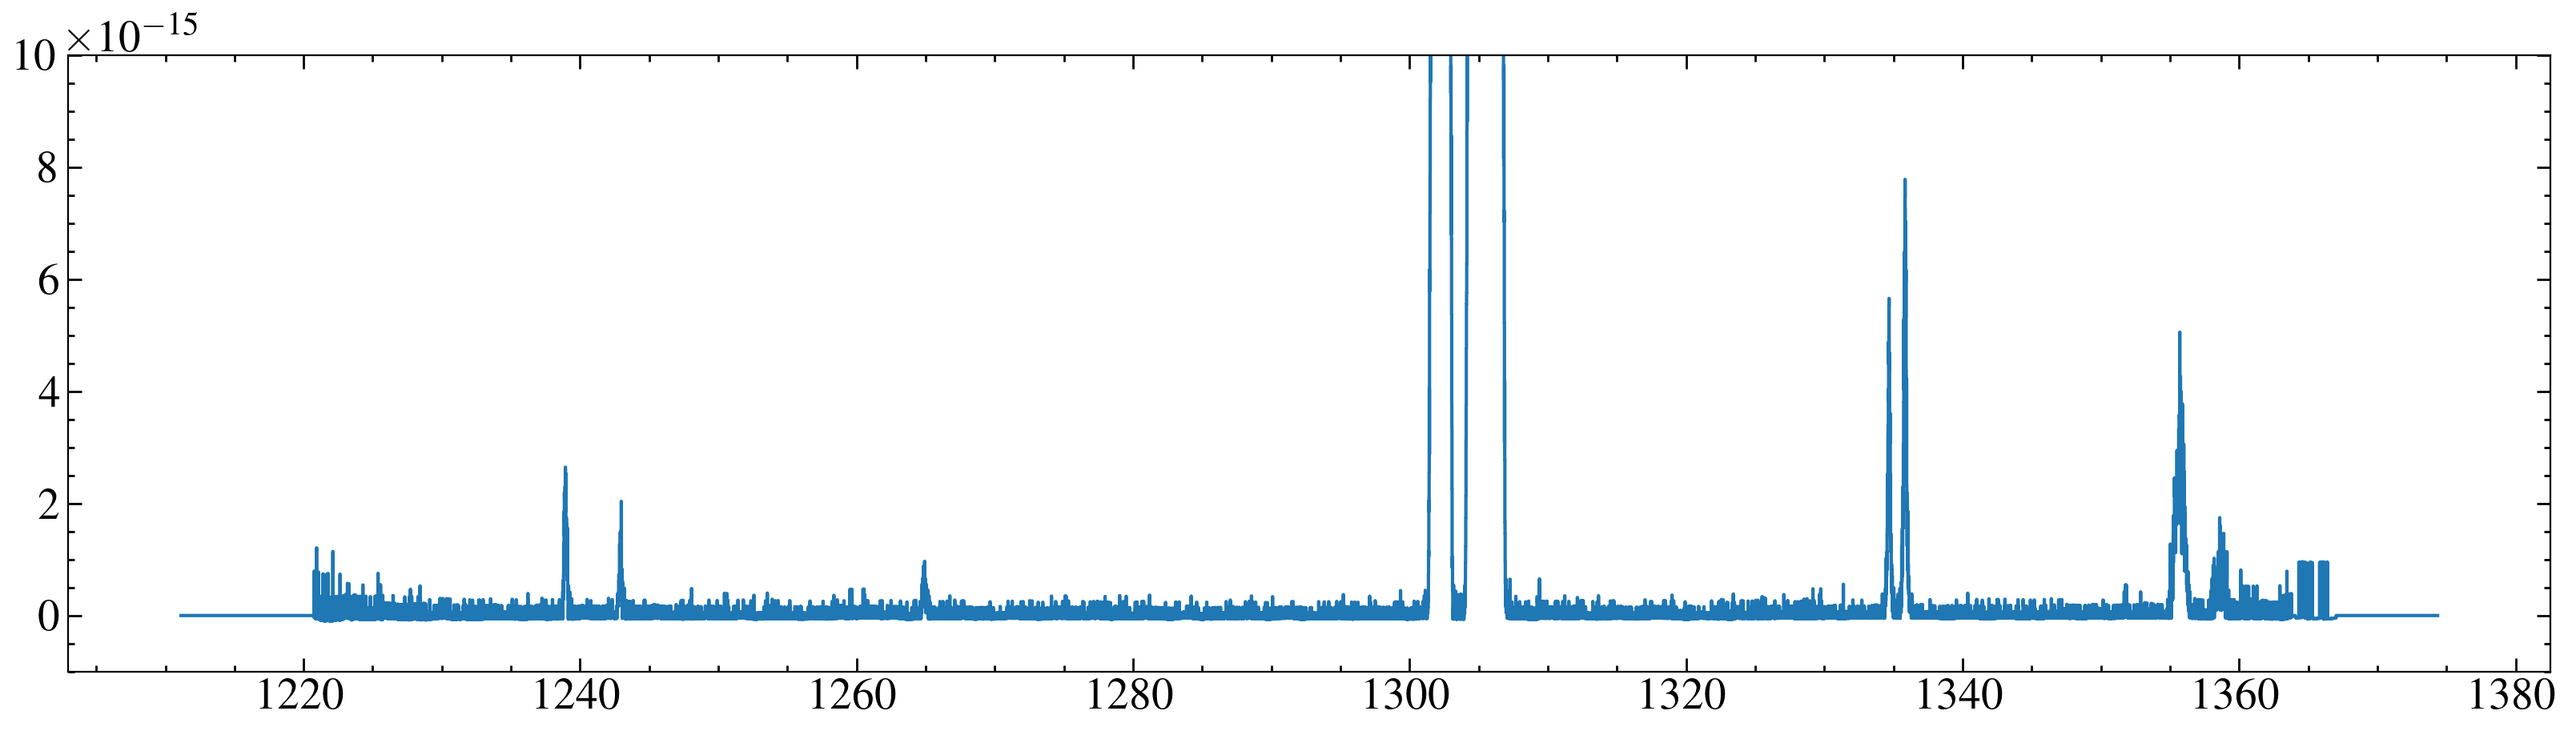

In [16]:
plt.figure(figsize=(20, 5))
for x in x1ds[-1:]:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    
    
    # w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid')
# plt.xscale('log')
# plt.yscale('log')
plt.ylim(-1e-15, 1e-14)
    # plt.show()
    

['/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/leoo12010_x1dsum.fits']
['/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/leoo12010_x1dsum.fits']


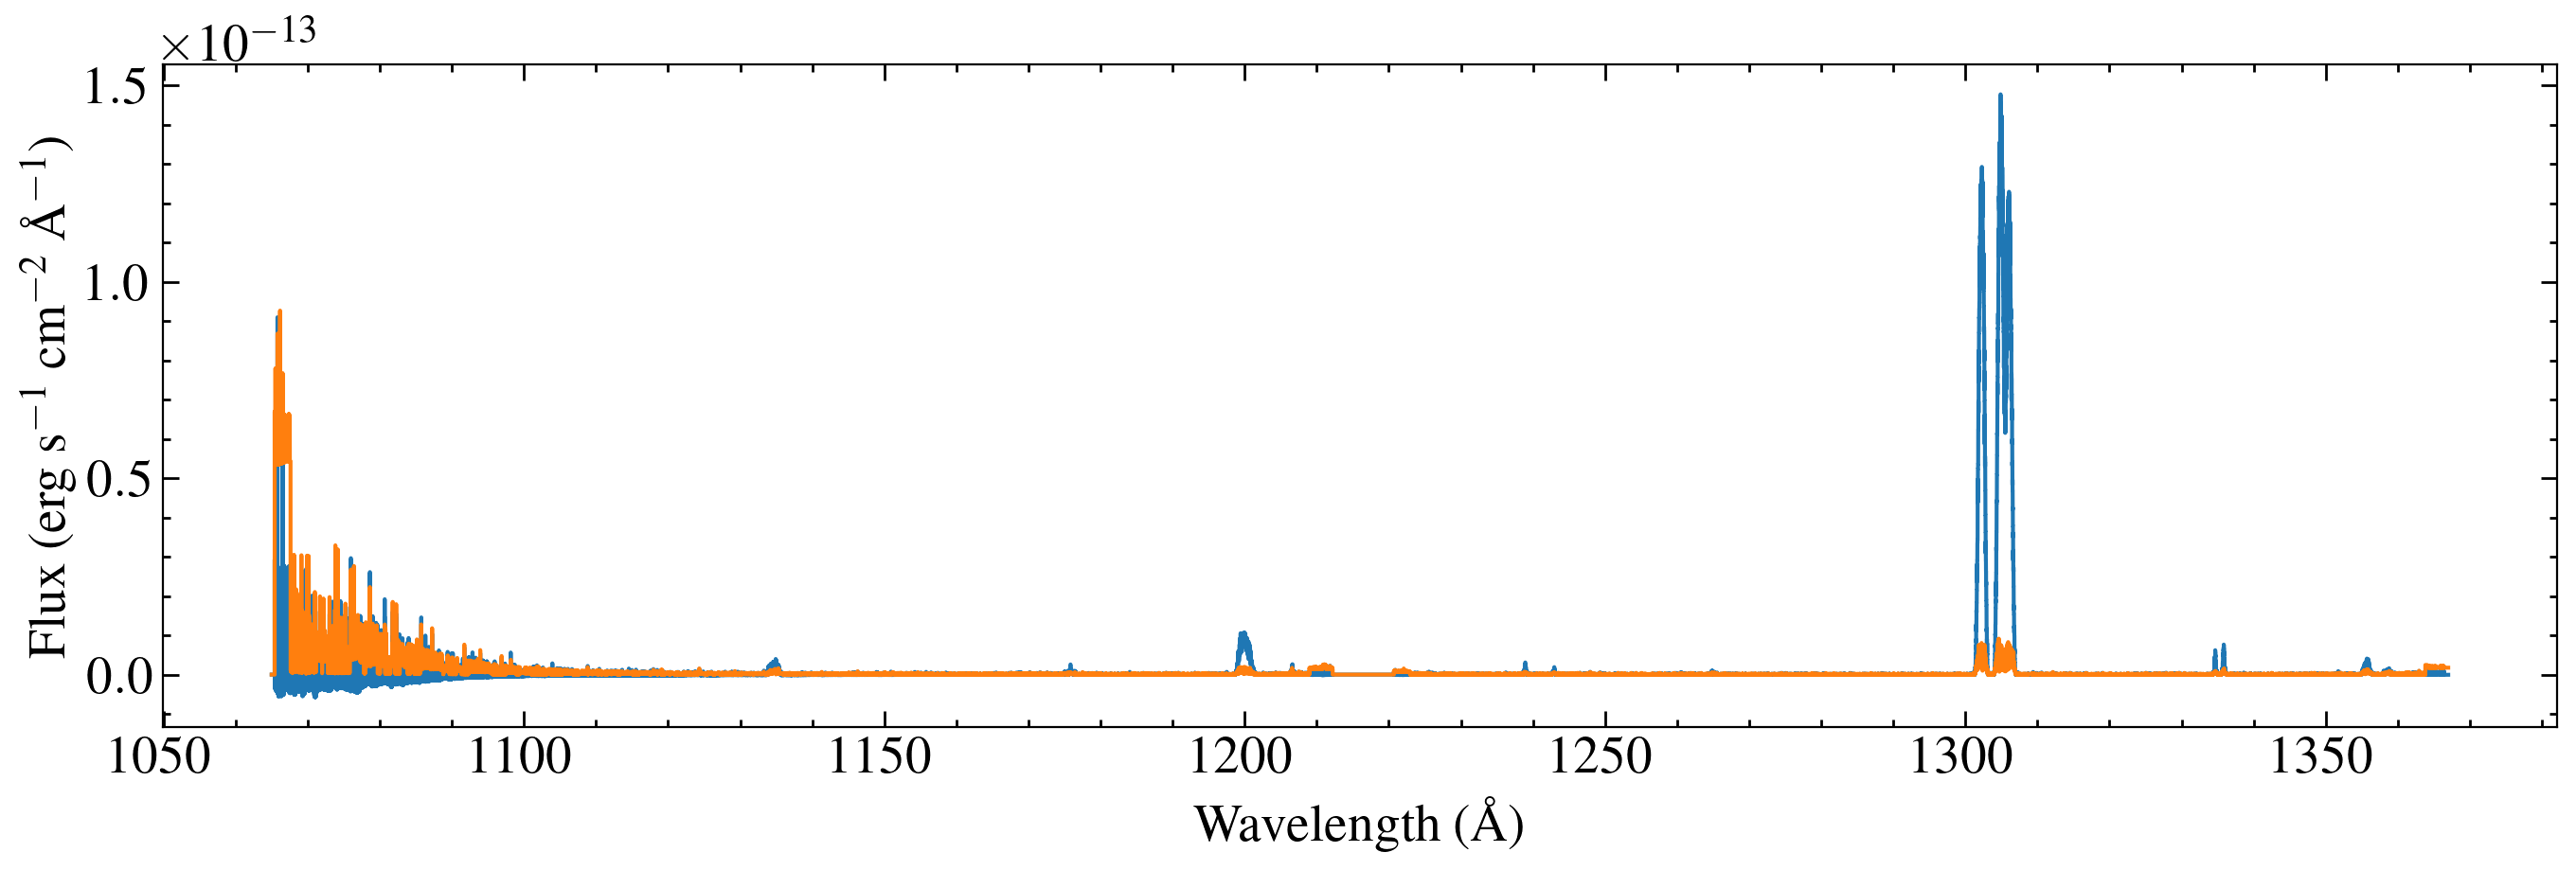

Spectrum saved as hlsp_muscles_hst_cos_toi-134_g130m_v1_component-spec.fits


In [19]:
import prepare_cos
# importlib.reload(prepare_cos)

savpath = 'cos_files/toi-134/TOI134_COS130M_Mm1_proc06mar2024.sav.txt'
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/toi-134/'
hlsp = 'meats_hlsp_info.csv'
version = 1
savepath = 'draft_hlsp/toi-134/'
# star = 
prepare_cos.make_cos_spectrum(savpath, version, x1dpath, hlsp, savepath = savepath, plot=True, save_fits=True, star='TOI-134')

(0.0, 2e-14)

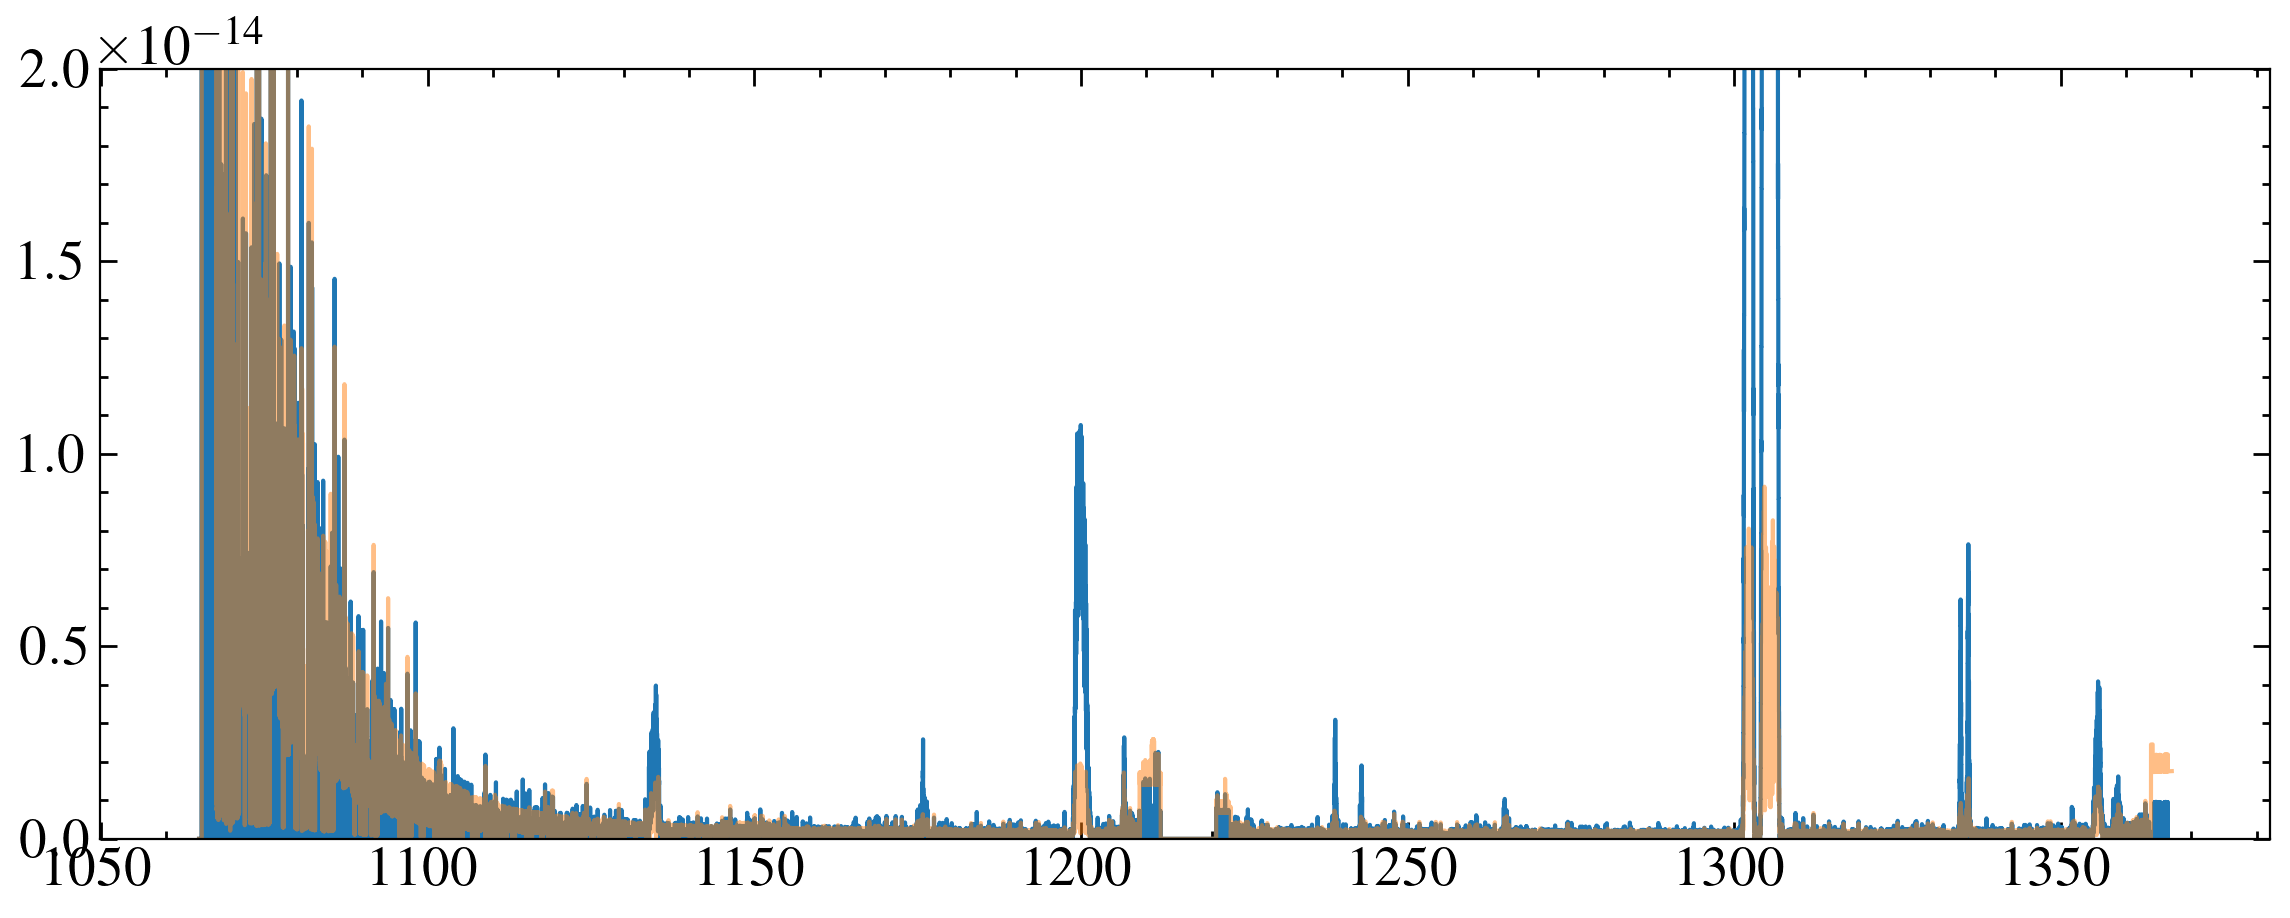

In [23]:
data = fits.getdata('draft_hlsp/toi-134/hlsp_muscles_hst_cos_toi-134_g130m_v1_component-spec.fits', 1)

w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
plt.step(w, f, where='mid')
plt.step(w, e, where='mid', alpha=0.5)
plt.ylim(0, 2e-14)